Here I have added all the independent variables to the model without checking data preporoceesssing 

### 1) Data Preprocessing

#### 1.1) Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # MATLAB-like way of plotting
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


# sklearn package for machine learning in python:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#### 1.2) Importing Dataset

In [2]:
df = pd.read_csv('houseprice_data.csv')
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

#### 1.3) Get the brief summary

In [3]:
# Statistics of the dataset
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.401822e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.673622e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258  98077.939805   
std      828.090978     442.575043     29.373411    401.679240     53.505026   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000   21613.000000   21613.000000  
mean      47.560053   -122.213896    1986.552492   12768.455652  
std        0.138564      0.140828     685.391304   27304.179631  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471000   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.230000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [4]:
# Get the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

#### 1.4) Missing values handling

In [5]:
missing_values = df.isnull().sum()

# Display the count of missing values
print(missing_values)

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


There are not missing values in any of the variable. Therefore we don't have to do missing value handling part

* Visualize the missingvalues

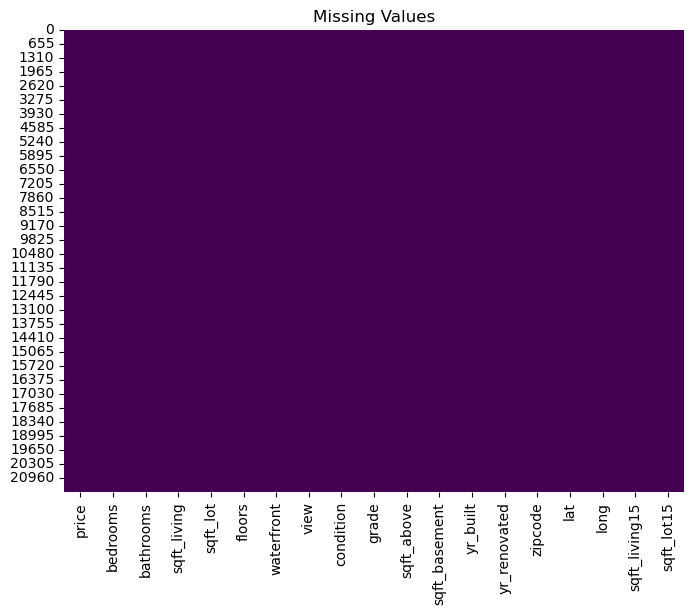

In [6]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values')
plt.show()

#### 1.5) Duplicate value handling

In [7]:
duplicate_rows = df[df.duplicated(keep='first')]
# first occurrence of the duplicate and marks the rest as duplicates.
num_duplicate_rows = len(duplicate_rows)

print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 5


In [8]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates(keep='first')

In [9]:
duplicate_rows = df[df.duplicated(keep='first')]
# first occurrence of the duplicate and marks the rest as duplicates.
num_duplicate_rows = len(duplicate_rows)

print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 0


#### 1.6) Data distribution of each variable

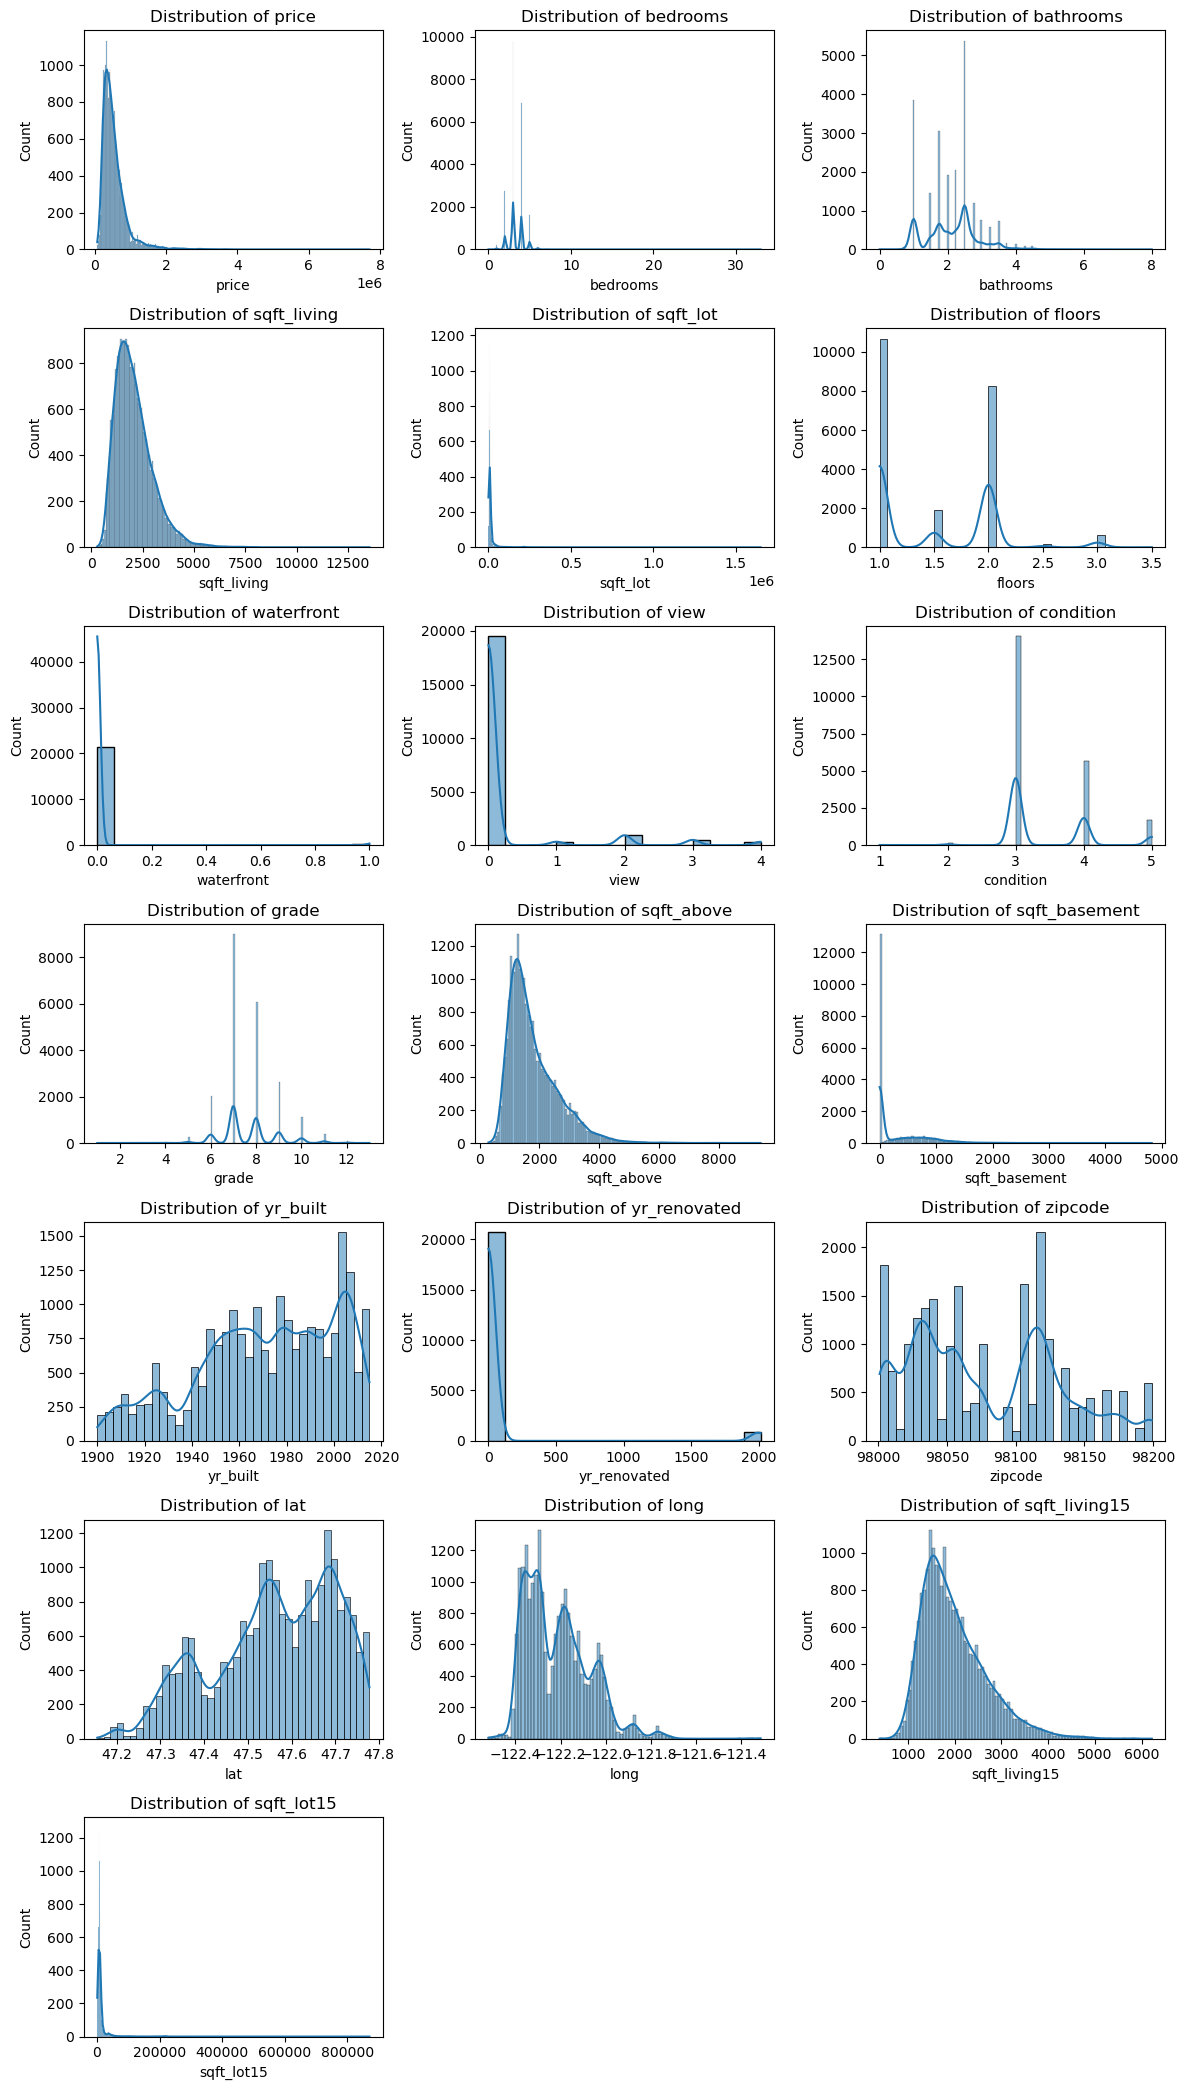

In [10]:
# Create subplots for each variable
plt.figure(figsize=(12, 21))  # Adjust the figure size as needed
for i, column in enumerate(df.columns):
    plt.subplot(7, 3, i + 1)  # Adjust the subplot layout as needed
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Apparently all the variables don't follow the normal distribution

* Check the distribution with response variable using scatteerplots

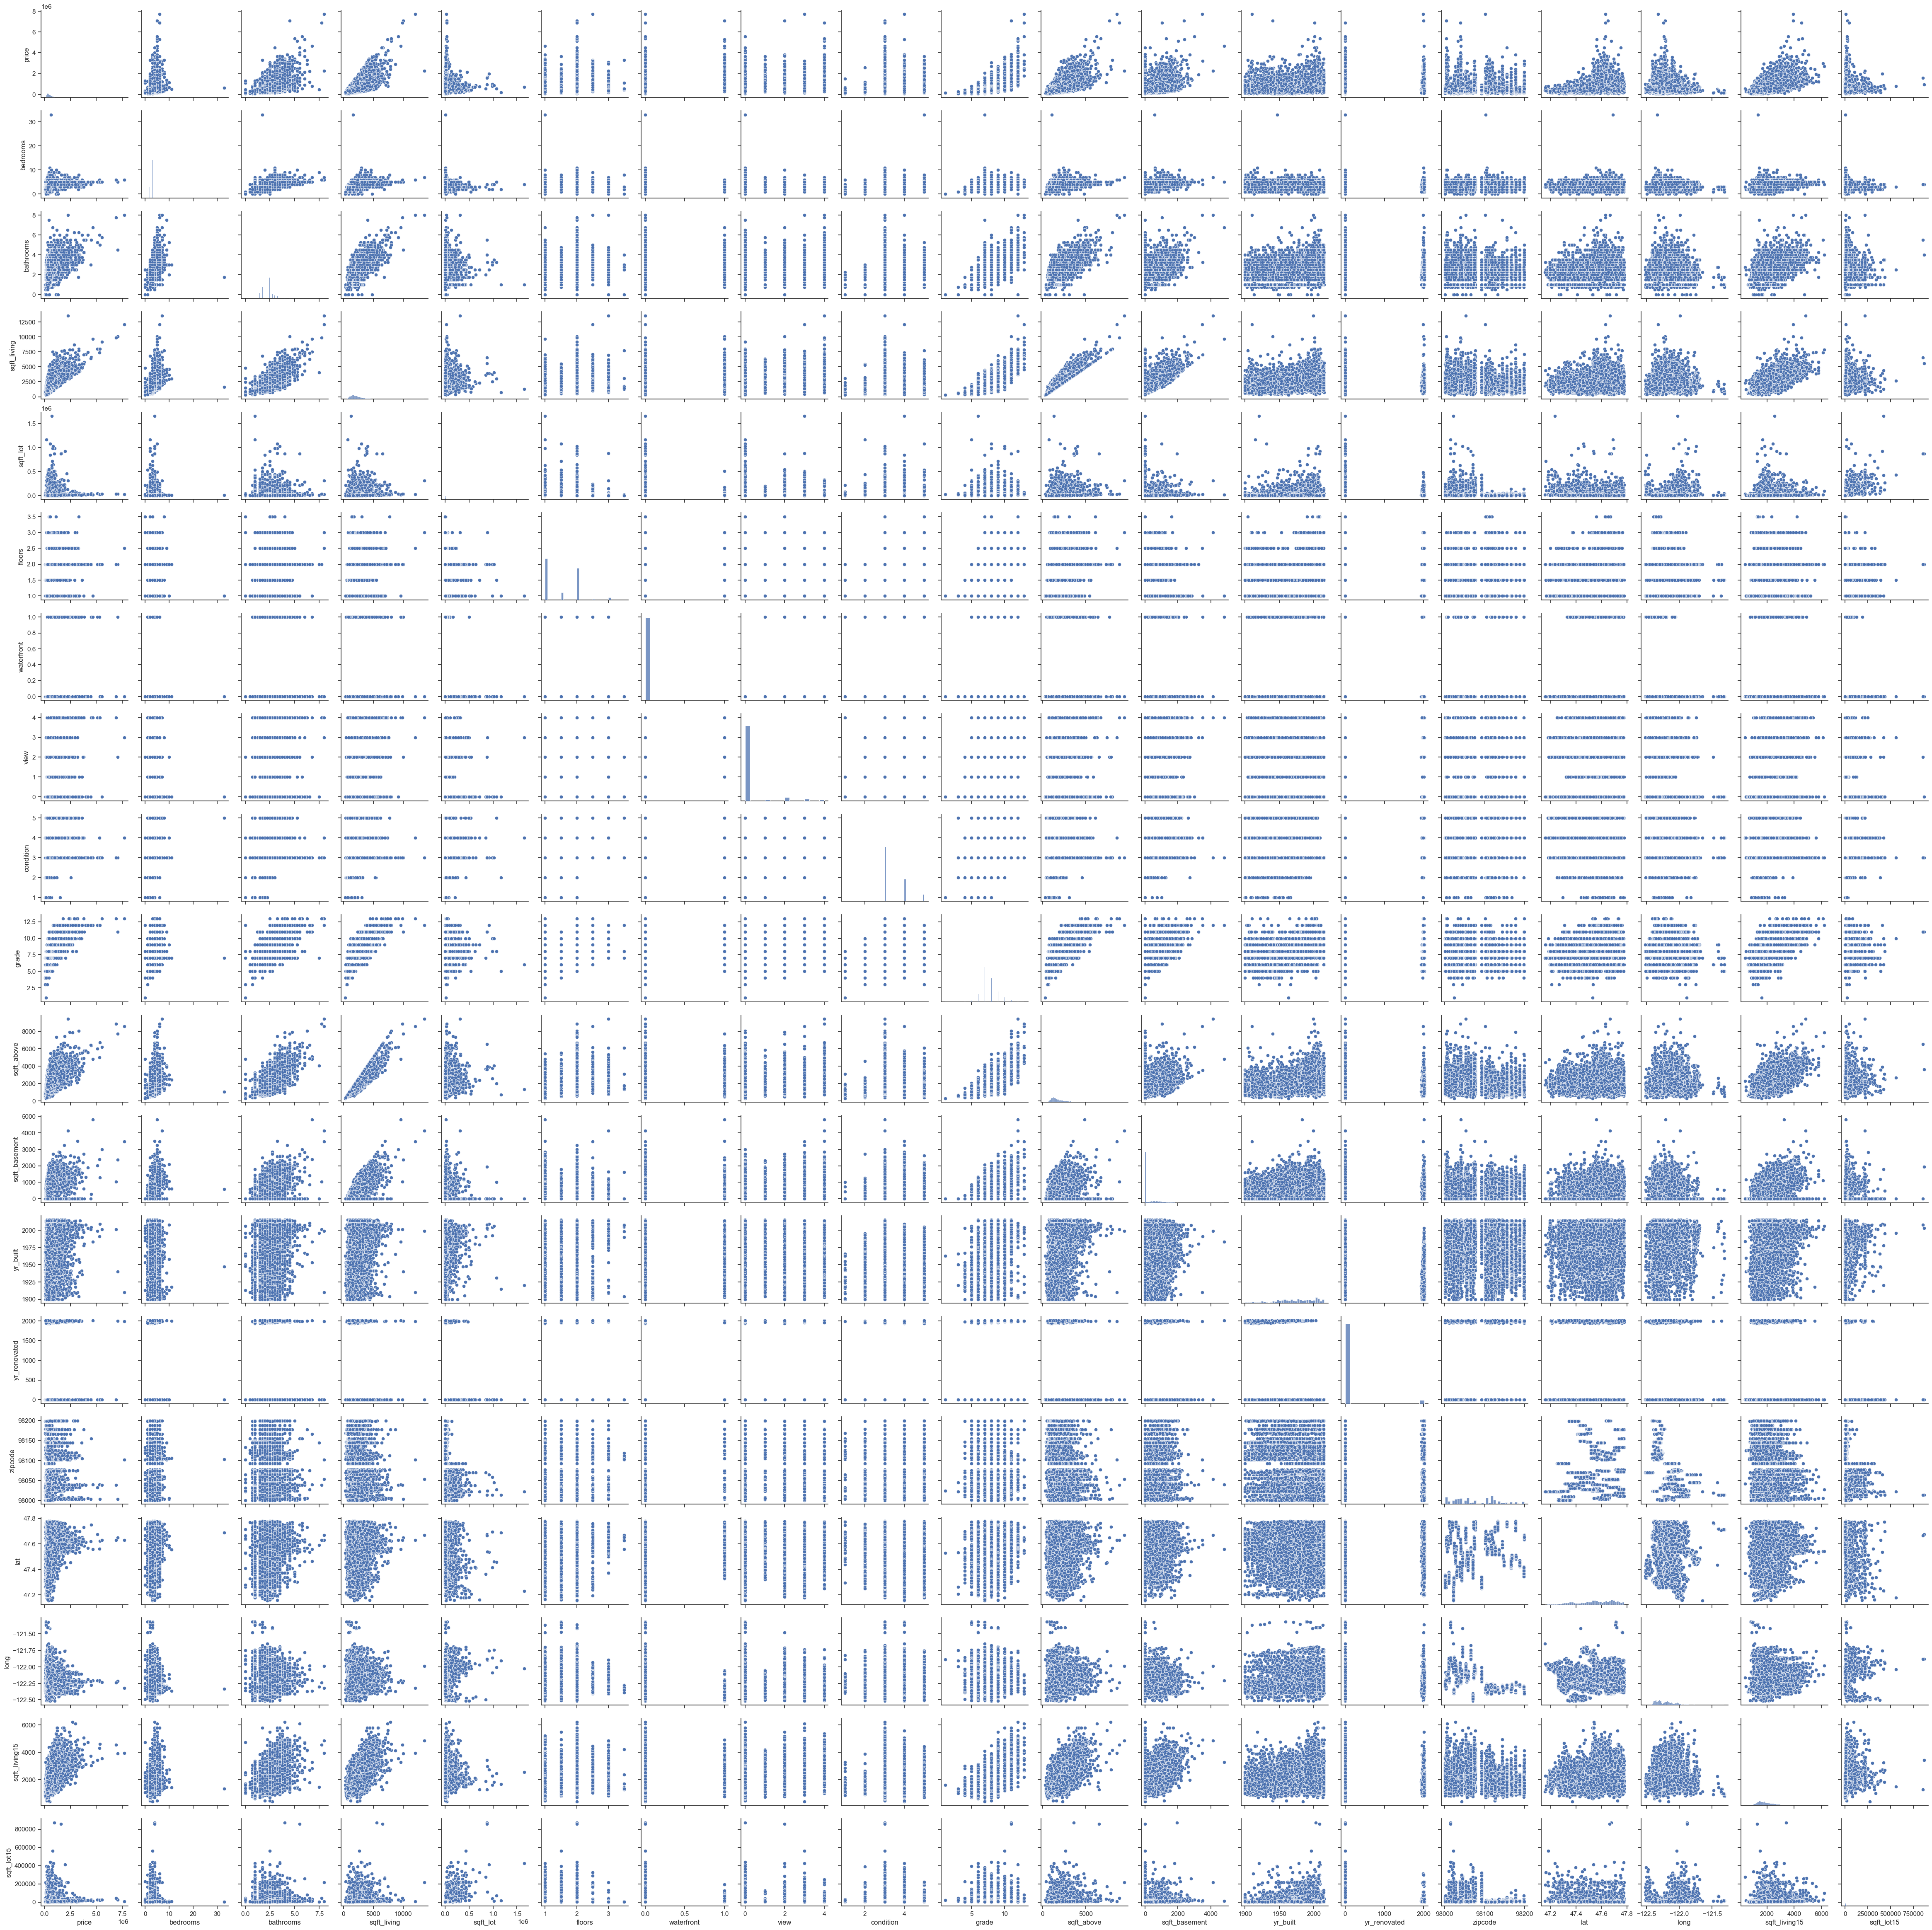

In [11]:
sns.set(style="ticks")
sns.pairplot(df)
plt.show()

1.7) Correlation Analysis

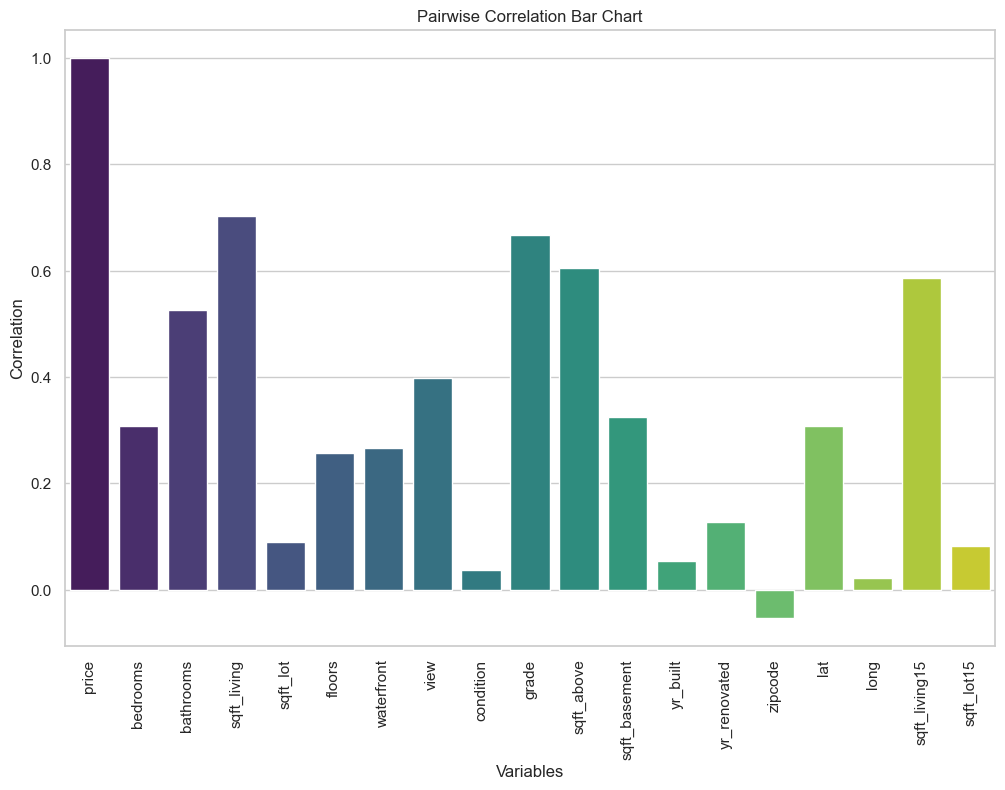

In [12]:
# Calculate the correlation matrix
corr_matrix = df.corr(method = 'pearson')

# Create a bar chart to display the correlations
plt.figure(figsize=(12, 8))  # Set the figure size
sns.set(style="whitegrid")  # Set the style of the chart

# Create a bar chart using a horizontal barplot
sns.barplot(x=corr_matrix.index, y=corr_matrix["price"], palette="viridis")

# Customize the chart
plt.title("Pairwise Correlation Bar Chart")
plt.xlabel("Variables")
plt.ylabel("Correlation")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

In [13]:
corr_matrix.iloc[:,0]

price            1.000000
bedrooms         0.308314
bathrooms        0.525143
sqft_living      0.702044
sqft_lot         0.089647
floors           0.256885
waterfront       0.266332
view             0.397462
condition        0.036375
grade            0.667570
sqft_above       0.605557
sqft_basement    0.323860
yr_built         0.054032
yr_renovated     0.126498
zipcode         -0.053144
lat              0.306917
long             0.021531
sqft_living15    0.585373
sqft_lot15       0.082443
Name: price, dtype: float64

* 'zipcode' variable doesn't give proper relationship with response variable and also it has negative correlation with response variable
* 'long' variable also doesn't represent any linear relationship according to the plot and its correlation is alo week
* 'yr_built' variable also doesn't represent any linear relationship according to the plot and its correlation is alo week
* 'sqft_lot' variable also doesn't represent any linear relationship according to the plot and its correlation is alo week
* yr_renovated' variable also doesn't represent any linear relationship according to the plot and its correlation is alo week

* Heatmnap to visualize correlations

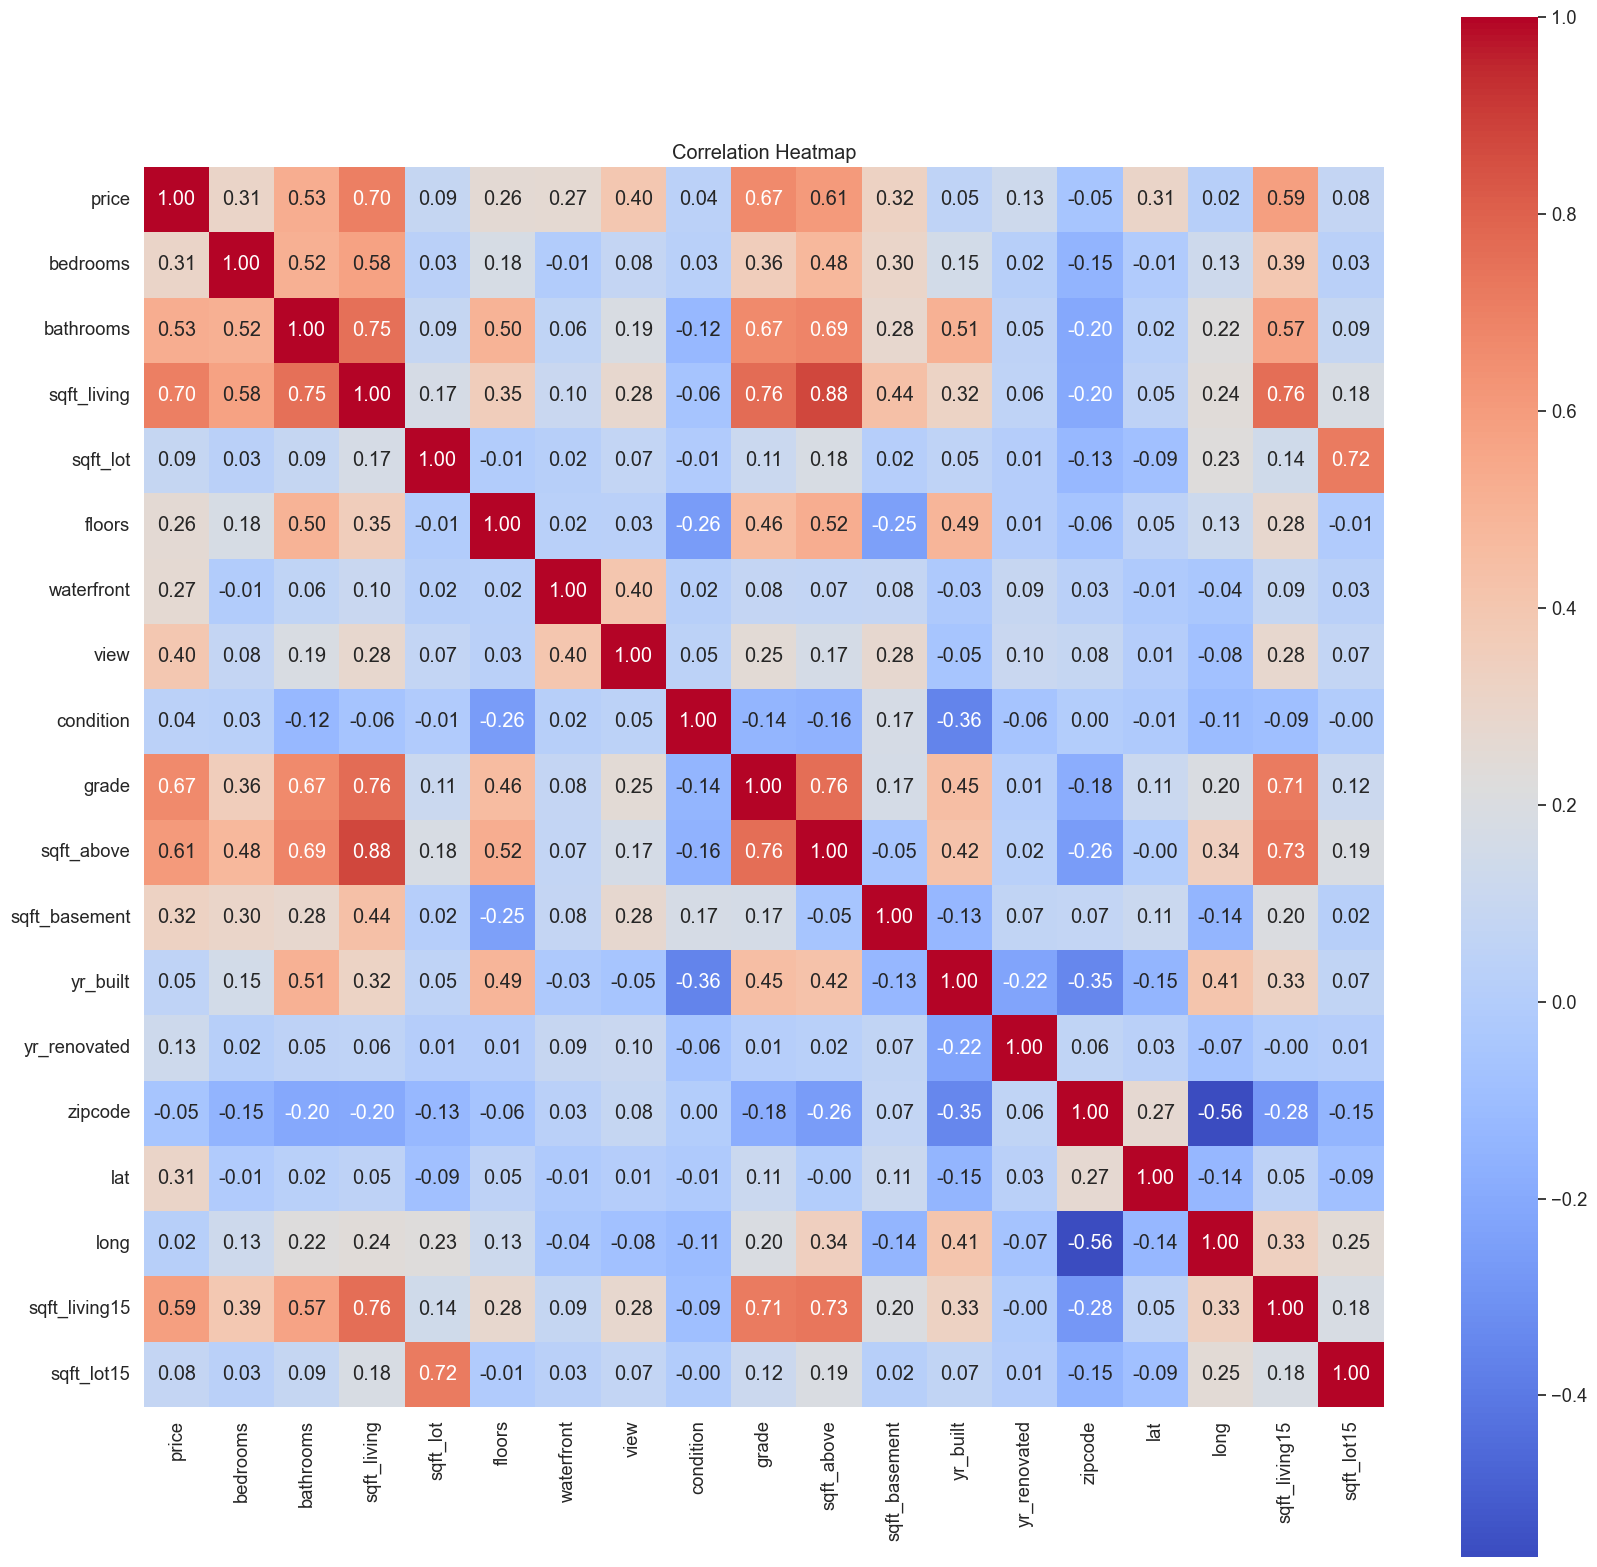

In [14]:
# Create a heatmap
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.2)  # Adjust font size for better readability

# Create a heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Customize the plot
plt.title("Correlation Heatmap")
plt.show()

#### 1.8) Outlier handling

* Detecting outliers using boxplots

price                Axes(0.125,0.77;0.168478x0.11)
bedrooms          Axes(0.327174,0.77;0.168478x0.11)
bathrooms         Axes(0.529348,0.77;0.168478x0.11)
sqft_living       Axes(0.731522,0.77;0.168478x0.11)
sqft_lot            Axes(0.125,0.638;0.168478x0.11)
floors           Axes(0.327174,0.638;0.168478x0.11)
waterfront       Axes(0.529348,0.638;0.168478x0.11)
view             Axes(0.731522,0.638;0.168478x0.11)
condition           Axes(0.125,0.506;0.168478x0.11)
grade            Axes(0.327174,0.506;0.168478x0.11)
sqft_above       Axes(0.529348,0.506;0.168478x0.11)
sqft_basement    Axes(0.731522,0.506;0.168478x0.11)
yr_built            Axes(0.125,0.374;0.168478x0.11)
yr_renovated     Axes(0.327174,0.374;0.168478x0.11)
zipcode          Axes(0.529348,0.374;0.168478x0.11)
lat              Axes(0.731522,0.374;0.168478x0.11)
long                Axes(0.125,0.242;0.168478x0.11)
sqft_living15    Axes(0.327174,0.242;0.168478x0.11)
sqft_lot15       Axes(0.529348,0.242;0.168478x0.11)
dtype: objec

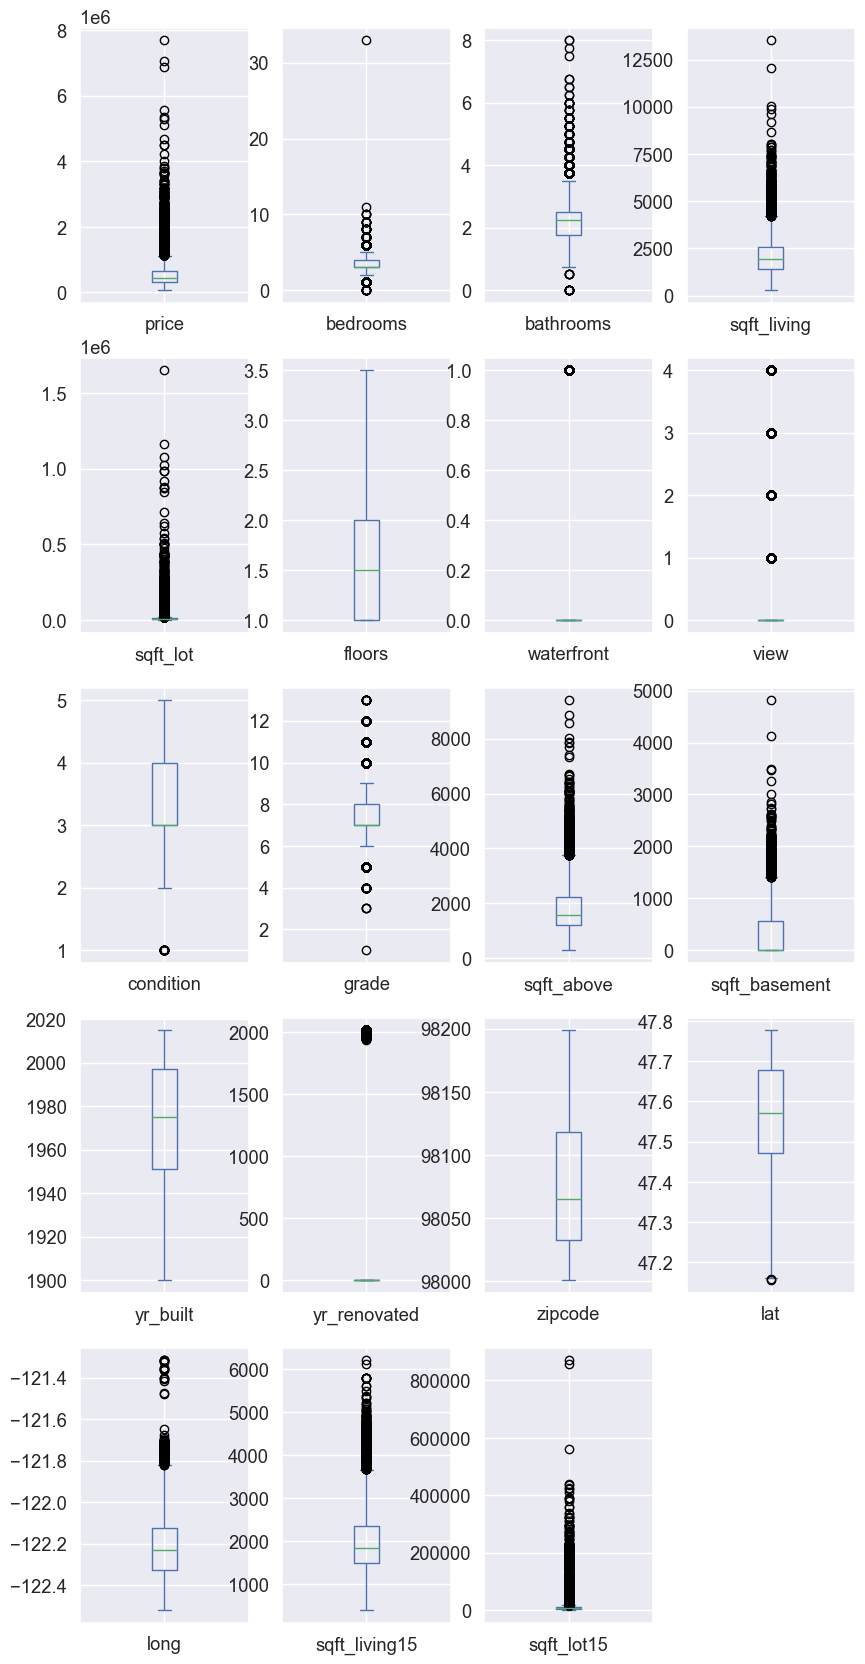

In [15]:
df.iloc[:,0:20].plot(kind="box", subplots=True, layout=(6,4), figsize=(10,25))

### 2) Modeling

In [16]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [28]:
X = df.iloc[:,1:19]
y = df.iloc[:,0]

In [29]:
X = np.array(X)
y = np.array(y)

In [30]:
# split the data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

In [31]:
# fit the linear least-squares regression line to the training data:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [32]:
# The coefficients
print('Coefficients: ', regr.coef_)
# The coefficients
print('Intercept: ', regr.intercept_)
# The mean squared error
print('Mean squared error: %.8f'% mean_squared_error(y_test, regr.predict(X_test)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, regr.predict(X_test)))

Coefficients:  [-3.43912220e+04  3.62095633e+04  1.15182755e+02  1.58860897e-01
  6.29009767e+03  6.22610040e+05  5.20062796e+04  2.65293406e+04
  9.65211391e+04  7.27518727e+01  4.24308821e+01 -2.54836534e+03
  2.28606108e+01 -6.13249424e+02  6.05490762e+05 -2.27701134e+05
  1.82930816e+01 -4.15170009e-01]
Intercept:  7851030.207457143
Mean squared error: 38176323391.19863129
Coefficient of determination: 0.70
